# Parcial 1

Al entregar la solución de este parcial, yo, Carlos Eduardo Figueredo Triana con código 201813445 me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial

### Objetivo del negocio

Tecnologías Alpes busca que mediante algoritmos de Machine Learning se pueda saber cuáles son los factores más importantes que generan que un empleado deje de estar en la empresa.

Variable objetivo: Permanece en empresa.

Variables de decisión: Las demás variables que afecten si el empleado permanece en la empresa o no.

Teniendo esto en cuenta, se usará el algoritmo de clasificación árboles de decisión.


### 1. Perfilamiento y preparación de datos

Se realiza importación de librerías

In [197]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree

Luego importamos los datos

In [132]:
df=pd.read_csv('Datos_EmpleadosAlpes.csv', sep=';', encoding = 'utf-8', index_col=None)

Vemos características de los datos

In [133]:
df.shape

(781, 18)

In [134]:
df.head()

,Edad,ViajesNegocio,PermaneceEnEmpresa,Distancia_casa,ID_empleado,Satisfacción_ambiente,Genero,Compromiso,Satisfaccion_trabajo,Estado_civil,Ingreso_mensual,SobreTiempo,Horas_Produccion,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe
0,29,Pocos,NO,5,471,3,Hombre,1.0,3,Soltero,2140,Si,80,0,7,6,1.0,0
1,30,Frecuentes,NO,8,1747,3,Mujer,2.0,4,Divorciado,2180,No,80,1,6,4,2.0,2
2,58,Pocos,NO,2,825,4,Hombre,3.0,2,Soltero,19246,Si,80,0,40,31,15.0,8
3,33,Pocos,NO,2,328,1,Mujer,3.0,1,Casado,2707,No,80,0,13,9,7.0,7
4,26,Pocos,NO,25,55,1,Hombre,1.0,3,Soltero,2293,No,80,0,1,1,0.0,1


In [135]:
df.dtypes

Edad                       int64
ViajesNegocio             object
PermaneceEnEmpresa        object
Distancia_casa             int64
ID_empleado                int64
Satisfacción_ambiente      int64
Genero                    object
Compromiso               float64
Satisfaccion_trabajo       int64
Estado_civil              object
Ingreso_mensual            int64
SobreTiempo               object
Horas_Produccion           int64
Bonos                      int64
Años_trabajando            int64
Años_Compañia              int64
Años_Rol_Actual          float64
Años_Actual_Jefe           int64
dtype: object

In [136]:
df.describe()

,Edad,Distancia_casa,ID_empleado,Satisfacción_ambiente,Compromiso,Satisfaccion_trabajo,Ingreso_mensual,Horas_Produccion,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe
count,781.000000,781.000000,781.000000,781.000000,772.000000,781.000000,781.000000,781.0,781.000000,781.000000,781.000000,774.000000,781.000000
mean,35.915493,9.560819,1003.172855,2.624840,2.652850,2.661972,5943.180538,80.0,0.713188,10.216389,6.773367,3.819121,3.711908
std,9.356228,7.985272,572.760376,1.104233,0.728308,1.082945,4460.332143,0.0,0.853165,7.584771,8.162209,3.524939,3.476695
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,3.000000,518.000000,2.000000,2.000000,2.000000,2622.000000,80.0,0.000000,5.000000,2.000000,2.000000,1.000000
50%,34.000000,8.000000,1011.000000,3.000000,3.000000,3.000000,4487.000000,80.0,1.000000,9.000000,5.000000,2.000000,2.000000
75%,42.000000,15.000000,1482.000000,4.000000,3.000000,4.000000,7446.000000,80.0,1.000000,14.000000,9.000000,7.000000,7.000000
max,60.000000,29.000000,2055.000000,5.000000,4.000000,4.000000,19973.000000,80.0,3.000000,40.000000,100.000000,18.000000,17.000000


Podemos ver que la mayoría se toman como valores numéricos enteros a excepción de Compromiso y Años rol actual, que se toman como flotantes.
Entonces veamos estas variables en profundidad.

In [137]:
pd.value_counts(df['Compromiso'])

3.0    438
2.0    217
4.0     61
1.0     56
Name: Compromiso, dtype: int64

In [138]:
pd.value_counts(df['Años_Rol_Actual'])

2.0     215
0.0     138
7.0      99
3.0      73
4.0      52
1.0      49
8.0      42
9.0      28
6.0      15
5.0      14
11.0     12
10.0     11
15.0      8
13.0      6
12.0      5
14.0      3
16.0      2
17.0      1
18.0      1
Name: Años_Rol_Actual, dtype: int64

In [139]:
df.isnull().sum()

Edad                     0
ViajesNegocio            0
PermaneceEnEmpresa       0
Distancia_casa           0
ID_empleado              0
Satisfacción_ambiente    0
Genero                   0
Compromiso               9
Satisfaccion_trabajo     0
Estado_civil             0
Ingreso_mensual          0
SobreTiempo              0
Horas_Produccion         0
Bonos                    0
Años_trabajando          0
Años_Compañia            0
Años_Rol_Actual          7
Años_Actual_Jefe         0
dtype: int64

Procedemos a eliminar los pocos valores nulos que hay y los posibles repetidos

In [140]:
# Eliminación registros con ausencias
df = df.dropna()
# Eliminación de registros duplicados.
df = df.drop_duplicates()

Procedemos a eliminar los ids

In [141]:
df = df.drop(['ID_empleado'], axis=1)

In [142]:
df.head()

,Edad,ViajesNegocio,PermaneceEnEmpresa,Distancia_casa,Satisfacción_ambiente,Genero,Compromiso,Satisfaccion_trabajo,Estado_civil,Ingreso_mensual,SobreTiempo,Horas_Produccion,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe
0,29,Pocos,NO,5,3,Hombre,1.0,3,Soltero,2140,Si,80,0,7,6,1.0,0
1,30,Frecuentes,NO,8,3,Mujer,2.0,4,Divorciado,2180,No,80,1,6,4,2.0,2
2,58,Pocos,NO,2,4,Hombre,3.0,2,Soltero,19246,Si,80,0,40,31,15.0,8
3,33,Pocos,NO,2,1,Mujer,3.0,1,Casado,2707,No,80,0,13,9,7.0,7
4,26,Pocos,NO,25,1,Hombre,1.0,3,Soltero,2293,No,80,0,1,1,0.0,1


Revisamos cada variable en busca de anomalías

In [143]:
pd.value_counts(df['ViajesNegocio'])

Pocos         553
Frecuentes    149
Nunca          56
Ninguno         7
Name: ViajesNegocio, dtype: int64

Ninguno no está en el diccionario, pero se interpretará como si fuera nunca

In [144]:
df['ViajesNegocio'].replace("Ninguno", "Nunca", inplace = True)
df['ViajesNegocio'].value_counts().to_frame()

,ViajesNegocio
Pocos,553
Frecuentes,149
Nunca,63


Ahora quedó acorde con el diccionario

In [145]:
pd.value_counts(df['Edad'])

29    41
35    41
32    40
33    39
31    37
34    36
30    33
36    28
28    26
39    25
40    24
26    21
37    21
44    20
38    20
25    20
46    19
27    19
42    19
45    17
24    16
41    16
49    15
43    14
23    13
50    13
53    11
55    11
20    10
47    10
19    10
48    10
21     9
22     9
51     9
54     9
56     8
52     7
18     6
58     6
59     3
57     2
60     2
Name: Edad, dtype: int64

Ninguna anomalía en edad.

In [146]:
pd.value_counts(df['PermaneceEnEmpresa'])

SI    412
NO    353
Name: PermaneceEnEmpresa, dtype: int64

Ninguna anomalía en PermaneceEnEmpresa.

In [147]:
pd.value_counts(df['Distancia_casa'])

1     95
2     91
9     48
3     46
8     45
7     42
4     41
10    40
5     32
6     30
24    18
25    17
13    17
15    16
16    16
18    15
11    15
22    14
23    14
21    14
20    13
12    13
19    13
29    12
14    12
17    11
26    11
28     7
27     7
Name: Distancia_casa, dtype: int64

Ninguna anomalía en DistanciaCasa.

In [148]:
pd.value_counts(df['Satisfacción_ambiente'])

3    245
4    194
1    168
2    154
5      4
Name: Satisfacción_ambiente, dtype: int64

Hay un valor fuera de rango (5), entonces se interpretará como que es 4 debido a que es el valor más cercano.

In [149]:
df['Satisfacción_ambiente'].replace(5, 4, inplace = True)
df['Satisfacción_ambiente'].value_counts().to_frame()

,Satisfacción_ambiente
3,245
4,198
1,168
2,154


In [150]:
pd.value_counts(df['Genero'])

Hombre    453
Mujer     298
M           7
F           7
Name: Genero, dtype: int64

Se entiende que M se refiere a Hombre y F a Mujer, entonces se realiza el reemplazo.

In [151]:
df['Genero'].replace("M", "Hombre", inplace = True)
df['Genero'].replace("F", "Mujer", inplace = True)
df['Genero'].value_counts().to_frame()

,Genero
Hombre,460
Mujer,305


In [152]:
pd.value_counts(df['Satisfaccion_trabajo'])

3    248
4    205
2    158
1    154
Name: Satisfaccion_trabajo, dtype: int64

Satisfaccion_trabajo está correcto.

In [153]:
pd.value_counts(df['Ingreso_mensual'])

2610    3
2293    3
2042    3
2362    3
2404    3
       ..
2067    1
5801    1
2741    1
2058    1
7140    1
Name: Ingreso_mensual, Length: 716, dtype: int64

Se entiende que Ingreso_mensual está lleno de valores numéricos, lo cual es correcto

In [154]:
pd.value_counts(df['Estado_civil'])

Soltero       316
Casado        315
Divorciado    134
Name: Estado_civil, dtype: int64

Estado_civil está correcto.

In [155]:
pd.value_counts(df['SobreTiempo'])

No    451
Si    314
Name: SobreTiempo, dtype: int64

SobreTiempo está correcto.

In [156]:
pd.value_counts(df['Horas_Produccion'])

80    765
Name: Horas_Produccion, dtype: int64

Puesto que en Horas_Produccion solo hay un valor, se procede a eliminarlo.

In [157]:
df = df.drop(['Horas_Produccion'], axis=1)

In [158]:
pd.value_counts(df['Bonos'])

0    379
1    273
2     71
3     42
Name: Bonos, dtype: int64

Bonos está correcto.

In [159]:
pd.value_counts(df['Años_trabajando'])

10    87
1     65
6     54
8     53
9     51
7     50
5     45
4     38
2     30
3     30
11    22
14    19
16    19
13    18
15    18
12    18
21    16
18    15
17    15
23    13
22    12
19    11
20     9
0      8
26     8
27     6
24     5
33     4
28     4
30     4
31     4
29     3
25     3
40     2
35     2
36     2
38     1
34     1
Name: Años_trabajando, dtype: int64

Años_trabajando está correcto

In [160]:
pd.value_counts(df['Años_Compañia'])

1      107
5       87
2       84
3       80
4       58
10      56
7       38
8       37
6       37
9       36
0       32
15      14
20      12
11      11
13      10
14       8
19       7
21       6
12       5
16       5
18       4
17       4
22       4
23       3
60       2
24       2
27       2
33       2
31       2
100      2
26       2
29       2
40       1
32       1
30       1
25       1
Name: Años_Compañia, dtype: int64

Años_Compañia está correcto.

In [161]:
pd.value_counts(df['Años_Actual_Jefe'])

2     181
0     166
7      92
3      67
8      51
1      51
4      45
9      28
6      25
5      20
10     11
13      7
11      7
12      6
14      3
15      3
17      2
Name: Años_Actual_Jefe, dtype: int64

Años_Actual_Jefe está correcto.

Ahora procedemos a convertir las variables categóricas en numéricas.

In [162]:
df.dtypes

Edad                       int64
ViajesNegocio             object
PermaneceEnEmpresa        object
Distancia_casa             int64
Satisfacción_ambiente      int64
Genero                    object
Compromiso               float64
Satisfaccion_trabajo       int64
Estado_civil              object
Ingreso_mensual            int64
SobreTiempo               object
Bonos                      int64
Años_trabajando            int64
Años_Compañia              int64
Años_Rol_Actual          float64
Años_Actual_Jefe           int64
dtype: object

Para ViajesNegocio interpretamos a Nunca como 0, Pocos como 1 y Frecuentes como 2.

In [163]:
atributo = 'ViajesNegocio'
def label_categorias(row):
    if row[atributo] == 'Nunca':
        return 0
    elif row[atributo] == 'Pocos':
        return 1
    elif row[atributo] == 'Frecuentes':
        return 2
    else:
        return None
df[atributo] = df.apply(lambda row: label_categorias(row), axis=1)
pd.value_counts(df['ViajesNegocio'])

1    553
2    149
0     63
Name: ViajesNegocio, dtype: int64

Para PermaneceEnEmpresa interpretaremos el Sí con 1 y el No con 0

In [164]:
atributo = 'PermaneceEnEmpresa'
def label_categorias(row):
    if row[atributo] == 'SI':
        return 1
    elif row[atributo] == 'NO':
        return 0
    else:
        return None
df[atributo] = df.apply(lambda row: label_categorias(row), axis=1)
pd.value_counts(df['PermaneceEnEmpresa'])

1    412
0    353
Name: PermaneceEnEmpresa, dtype: int64

Para Genero identificaremos Hombre con 0 y Mujer con 1

In [165]:
atributo = 'Genero'
def label_categorias(row):
    if row[atributo] == 'Mujer':
        return 1
    elif row[atributo] == 'Hombre':
        return 0
    else:
        return None
df[atributo] = df.apply(lambda row: label_categorias(row), axis=1)
pd.value_counts(df['Genero'])

0    460
1    305
Name: Genero, dtype: int64

Para Estado_civil identificaremos Soltero con 0, Casado con 1 y Divorciado con 2

In [166]:
atributo = 'Estado_civil'
def label_categorias(row):
    if row[atributo] == 'Soltero':
        return 0
    elif row[atributo] == 'Casado':
        return 1
    elif row[atributo] == 'Divorciado':
        return 2
    else:
        return None
df[atributo] = df.apply(lambda row: label_categorias(row), axis=1)
pd.value_counts(df['Estado_civil'])

0    316
1    315
2    134
Name: Estado_civil, dtype: int64

Para SobreTiempo identificaremos Si con 1 y No con 0

In [167]:
atributo = 'SobreTiempo'
def label_categorias(row):
    if row[atributo] == 'Si':
        return 1
    elif row[atributo] == 'No':
        return 0
    else:
        return None
df[atributo] = df.apply(lambda row: label_categorias(row), axis=1)
pd.value_counts(df['SobreTiempo'])

0    451
1    314
Name: SobreTiempo, dtype: int64

In [168]:
df.dtypes

Edad                       int64
ViajesNegocio              int64
PermaneceEnEmpresa         int64
Distancia_casa             int64
Satisfacción_ambiente      int64
Genero                     int64
Compromiso               float64
Satisfaccion_trabajo       int64
Estado_civil               int64
Ingreso_mensual            int64
SobreTiempo                int64
Bonos                      int64
Años_trabajando            int64
Años_Compañia              int64
Años_Rol_Actual          float64
Años_Actual_Jefe           int64
dtype: object

In [169]:
df.shape

(765, 16)

In [170]:
# Vamos a seleccionar de nuestro conjunto solo los atributos numéricos.
number_cols = df.dtypes[(df.dtypes == np.int64) | (df.dtypes == np.float64)].index 
number_cols = df.select_dtypes(include = ['int64','float']).columns
number_cols

Index(['Edad', 'ViajesNegocio', 'PermaneceEnEmpresa', 'Distancia_casa',
       'Satisfacción_ambiente', 'Genero', 'Compromiso', 'Satisfaccion_trabajo',
       'Estado_civil', 'Ingreso_mensual', 'SobreTiempo', 'Bonos',
       'Años_trabajando', 'Años_Compañia', 'Años_Rol_Actual',
       'Años_Actual_Jefe'],
      dtype='object')

In [171]:
df = df[number_cols]

### 2. Modelo (árboles de decisión)

In [172]:
# Se selecciona la variable objetivo, en este caso "PermaneceEnEmpresa".
Y = df['PermaneceEnEmpresa']
# Del conjunto de datos se elimina la variable "PermaneceEnEmpresa"
X = df.drop(['PermaneceEnEmpresa'], axis=1)

In [173]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [174]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [175]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20],'min_samples_split':[2, 3, 4, 5]}

In [176]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

In [177]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [178]:
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [179]:
# Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.79
Exactitud sobre test: 0.73


### 3. Evaluación

              precision    recall  f1-score   support

           0       0.72      0.61      0.66        67
           1       0.73      0.81      0.77        86

    accuracy                           0.73       153
   macro avg       0.72      0.71      0.72       153
weighted avg       0.72      0.73      0.72       153



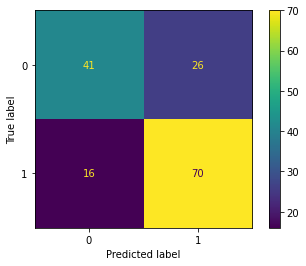

In [180]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred_test))
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol_final, X_test, Y_test)  
plt.show()  

Datos de prueba
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       286
           1       0.79      0.83      0.81       326

    accuracy                           0.79       612
   macro avg       0.79      0.79      0.79       612
weighted avg       0.79      0.79      0.79       612



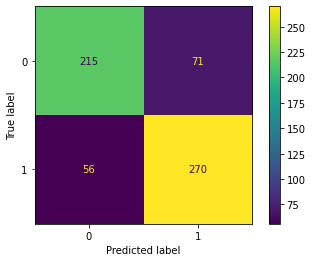

In [181]:
# Se imprime el informe de rendimiento
print("Datos de prueba")
print(classification_report(Y_train, y_pred_train))
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol_final, X_train, Y_train)  
plt.show()  

Podemos ver que tanto en conjunto entrenamiento como en test el modelo dio un desempeño alto.

### 4. Interpretación del modelo

In [182]:
# Obtener la importancia de las variables. Mientras mayor el coeficiente, más la importancia.
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns, "Importancia": arbol_final.feature_importances_})
importancia_atributo = importancia_atributo.sort_values(by = 'Importancia', ascending = False).reset_index(drop = True)
importancia_atributo

,Atributo,Importancia
0,Ingreso_mensual,0.349048
1,SobreTiempo,0.290146
2,Años_Compañia,0.111007
3,Estado_civil,0.100891
4,Satisfacción_ambiente,0.063595
5,Edad,0.041245
6,Distancia_casa,0.032618
7,ViajesNegocio,0.011450
8,Genero,0.000000
9,Compromiso,0.000000


Como podemos ver, las variables más importantes que afectan si el empleado permanece o no en la empresa son "Ingreso mensual", "SobreTiempo" y "Años en la compañía". Con base en esto, la compañía puede tratar estas variables para poder disminuir la rotación de empleados.

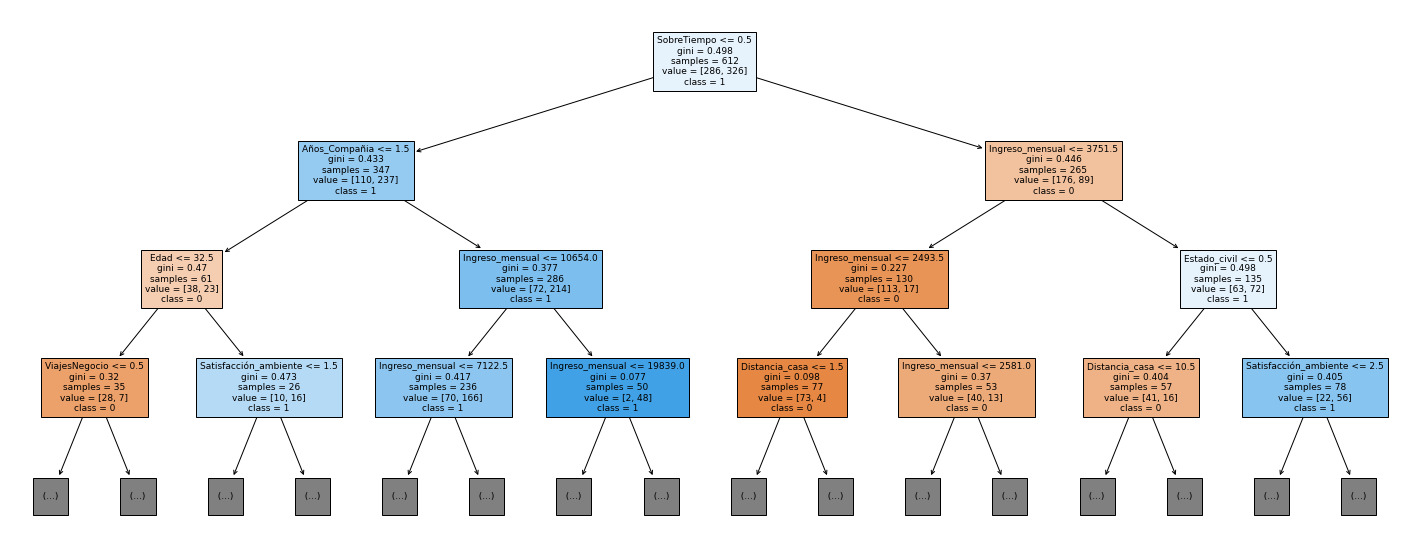

In [183]:
#Gráfico de los primeros 3 niveles del árbol
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol_final, max_depth=3, feature_names=X.columns, class_names=["0", "1", "2"], filled=True, fontsize=9)

Ahora podemos probar el modelo con un valor del conjunto:

In [184]:
# Se calcula la probabilidad de que un dato cualquiera sea puesto en cada categoría
print(arbol_final.predict_proba(X_test.iloc[[13]]))

[[0.02040816 0.97959184]]


En este caso, el valor 13 tiene una probabilidad del 2% de dejar la empresa.

### 5. Valor para el negocio

Concluimos que el modelo sirve para poder predecir si un empleado va a dejar la compañía o no, esto permitiría a la compañía tomar decisiones respecto al empleado y las variables más importantes que afectan si se queda o no en la compañía.

## Parcial 1 - parte 2

La empresa no ha decidido usar la tarea que se propuso previamente, entonces se hará uso de una nueva tarea con el algoritmo KNN.

### Construcción del modelo con KNN:

Para usar el algoritmo KNN tenemos que establecer sus hiperparámetros, para esto establecemos el espacio de búsqueda y usaremos GridSearchCV para iterar en los valores y hallar los mejores hiperparámetros.

In [185]:
# Primero definamos el espacio de búsqueda
n_vecinos =  list(range(1,15))

In [186]:
param_grid = {'n_neighbors': n_vecinos, 'p': [1, 2, 3, 4]}

In [187]:
clasificadorKNN = KNeighborsClassifier()
modelo_Knn = GridSearchCV(clasificadorKNN, param_grid, cv=particiones)
modelo_Knn.fit(X_train,Y_train) 
print("Mejor parámetro: {}".format(modelo_Knn.best_params_)) 
print("Mejor cross-validation score: {:.2f}".format(modelo_Knn.best_score_))

Mejor parámetro: {'n_neighbors': 7, 'p': 1}
Mejor cross-validation score: 0.63


Los mejores hiperparámetros que nos arrojó fueron n_neighbors igual a 7, p igual a 1 y cross-validation score igual a 0.63

### Evaluación

In [188]:
# Obtener el mejor modelo.
modelo_final = modelo_Knn.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = modelo_final.predict(X_train)
y_pred_test = modelo_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.72
Exactitud sobre test: 0.54


              precision    recall  f1-score   support

           0       0.69      0.71      0.70       286
           1       0.74      0.73      0.73       326

    accuracy                           0.72       612
   macro avg       0.72      0.72      0.72       612
weighted avg       0.72      0.72      0.72       612



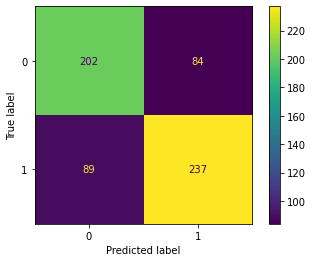

In [189]:
# Mostrar reporte de clasificación sobre entrenamiento
print(classification_report(Y_train, y_pred_train))
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(modelo_final, X_train, Y_train)  
plt.show() 

              precision    recall  f1-score   support

           0       0.47      0.54      0.50        67
           1       0.60      0.53      0.56        86

    accuracy                           0.54       153
   macro avg       0.54      0.54      0.53       153
weighted avg       0.54      0.54      0.54       153



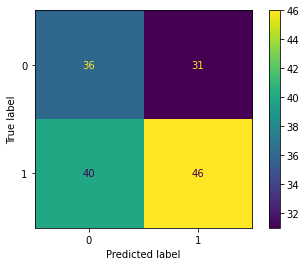

In [190]:
# Mostrar reporte de clasificación sobre test
print(classification_report(Y_test, y_pred_test))
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(modelo_final, X_test, Y_test)  
plt.show()  

En el caso de uso del modelo con algoritmo KNN obtuvimos un desempeño en conjunto de entrenamiento del 72% y en el conjunto test del 54%, pero resulta que el algoritmo de árboles de decisión obtuvo un desempeño en conjunto de entrenamiento del 79% y en el conjunto test del 72%.

### Interpretación del modelo:

In [191]:
# Se calcula la probabilidad de que un dato cualquiera sea puesto en cada categoría
print(modelo_final.predict_proba(X_test.iloc[[13]]))

[[0.42857143 0.57142857]]


Usando el algoritmo KNN para el registro 13 nos muestra una probabilidad del 42% de que el empleado no permanezca en la empresa, mientras que cuando usamos el algoritmo árboles de decisión con el mismo registro, este nos dio un valor del 2% de que el empleado no permanezca en la empresa.

### Valor para el negocio:

Viendo los resultados del uso de ambos algoritmos como tareas de aprendizaje, se le recomendaría a la empresa el aceptar usar el algoritmo de árboles de decisión sobre el de KNN. No solo el desempeño es más alto en árboles de decisión sino que también muestra las variables más importantes que afectan si el empleado permanece en la empresa o no.